<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Nicholas_George_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#list
sales =  [3505, 2400, 3027, 2798, 3700, 3250, 2689]

#mean
mean = sum(sales)/len(sales)

#comprehensive list variance function
var = sum([(ii-mean)**2/len(sales) for ii in sales])

#check for variance hard coded
#var_2 = ((3505-mean)**2+(2400-mean)**2+(3027-mean)**2+(2798-mean)**2+(3700-mean)**2+(3250-mean)**2+(2689-mean)**2)/len(sales)

#standard deviation
sales_std_dev = var**0.5

#print
print('The mean is: ', round(mean,2),'. The variance is: ', round(var,2), '. The standard deviation is: ', round(sales_std_dev,2),'.')

The mean is:  3052.71 . The variance is:  183761.06 . The standard deviation is:  428.67 .


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [69]:
#finding covariance
cust_lw = [127, 80, 105, 92, 120, 115, 93]

#putting sales and customers into a dictionary
dict = {'Customers': cust_lw, 'Sales': sales}  

#putting that dictionary into a dataframe    
df = pd.DataFrame(dict)

df

,Customers,Sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3250
6,93,2689


In [70]:
#finding the covariance of the dataframe
df_cov = df.cov()
df_cov

,Customers,Sales
Customers,290.952381,7604.357143
Sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [64]:
cust_lw = [127, 80, 105, 92, 120, 115, 93]
sales =  [3505, 2400, 3027, 2798, 3700, 3250, 2689]
#expecting correlation coefficient close to 1

#mean
cust_mean = sum(cust_lw)/len(cust_lw)

#comprehensive list variance function
cust_var = sum([(ii-cust_mean)**2/len(cust_lw) for ii in cust_lw])

#standard deviation
cust_std_dev = cust_var**0.5

print('The standard deviation of customers who entered the store last week was: ', round(cust_std_dev,3),'.')

#finding the correlation coefficient
#breaking the code down
#lets grab the sales/customers covariance relationship
#grabbing cov(a,b)
df_cov.iloc[0]['Customers'] #this grabs the 0th number from the "Customers" column
sales_std_dev**cust_std_dev #this multiplies the two std devs 

r = (df_cov.iloc[0]['Customers'])/(sales_std_dev*cust_std_dev) #this is the formula 
print('The correlation coefficient between sales and customers from last week is: ', r,'.')

The standard deviation of customers who entered the store last week was:  15.792 .
The correlation coefficient between sales and customers from last week is:  1.123306307450706 .


In [60]:
#check
sales_std_dev

428.67360686714756

In [61]:
#check
cust_std_dev

15.792015549069118

In [67]:
#check
sales_std_dev*cust_std_dev

6769.620265121536

In [50]:
#double check
df.corr() #hmm, above formula is wrong?

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [73]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
#covariance
df_titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [74]:
#correlation
df_titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

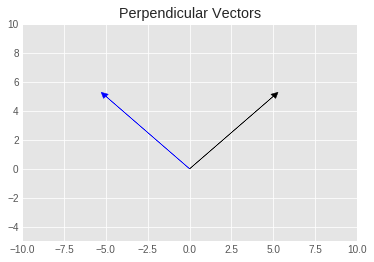

In [97]:
#a synonym for orthogonal is perpendicular
first = [-5, 5]
second = [5, 5]
plt.arrow(0,0, first[0], first[1],head_width=.4, head_length=0.4, color ='blue')
plt.arrow(0,0, second[0], second[1],head_width=.4, head_length=0.4, color ='black')
plt.title("Perpendicular Vectors")
plt.xlim(-10,10)          
plt.ylim(-5,10)
plt.style.use('ggplot')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [121]:
a = np.matrix('-5,3,7')
b = np.matrix('6,-8,2').T
print('Numpy matrix matmul function gives: ', np.matmul(a,b)) #not

#check
ortho = (-5*6) + (3*-8) + (7*2)
print('Hard code check gives: ', ortho)
print('Not orthogonal because the dot product does not equal zero.')

Numpy matrix matmul function gives:  [[-40]]
Hard code check gives:  -40
Not orthogonal because the dot product does not equal zero.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [131]:
2**2

4

In [154]:
#find the norm aka magnitude squared
from scipy import linalg

c = np.array([2,-15,6,20])

#tranpose with np array
cT_arr = np.transpose(c)

#transpose with np matrix
cT = np.matrix('2,-15,6,20').T

#magnitude
c_norm = linalg.norm(c)**2

#c = c**2 #check

#printing magnitude
print(c_norm) 

#printing c * c
print(c*c)

#printing transpose of C times C
print(cT*c)

665.0
[  4 225  36 400]
[[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


In [0]:
#they all have the number 665 in common

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

##Answer
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

&

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [167]:
#turning f into a unit vector
f = np.matrix('4,12,11,9,2')
f_norm = linalg.norm(f)
f_unit_vector = f/f_norm
print('The unit vector of f is = ', f_unit_vector, '.')

The unit vector of f is =  [[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]] .


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

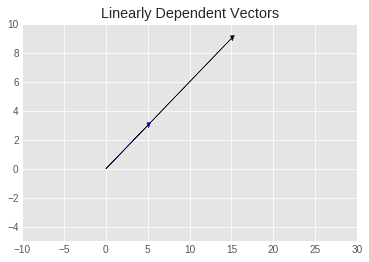

In [176]:
lin_1 = [5, 3]
#scaled
lin_2 = np.multiply(3, lin_1)

#plot
plt.arrow(0,0, lin_1[0], lin_1[1],head_width=.4, head_length=0.4, color ='blue')
plt.arrow(0,0, lin_2[0], lin_2[1],head_width=.4, head_length=0.4, color ='black')
plt.title("Linearly Dependent Vectors")
plt.xlim(-10,30)          
plt.ylim(-5,10)
plt.style.use('ggplot')
plt.show()

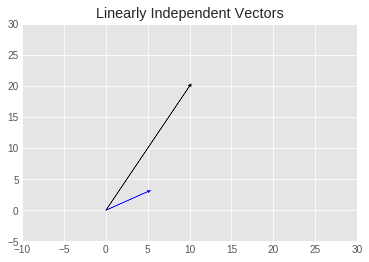

In [185]:
lin_1 = [5, 3,7]
#scaled
lin_2 = [10, 20, 25]

#plot
plt.arrow(0,0, lin_1[0], lin_1[1],head_width=.4, head_length=0.4, color ='blue')
plt.arrow(0,0, lin_2[0], lin_2[1],head_width=.4, head_length=0.4, color ='black')
plt.title("Linearly Independent Vectors")
plt.xlim(-10,30)          
plt.ylim(-5,30)
plt.style.use('ggplot')
plt.show()

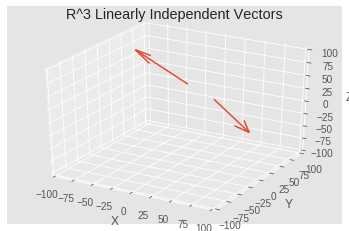

In [210]:
#r3

from mpl_toolkits.mplot3d import Axes3D

vectors = np.array([[-30,72,12,-100, 50, 20],[20,43,10,25,40, -80]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.style.use('ggplot')
plt.title("R^3 Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

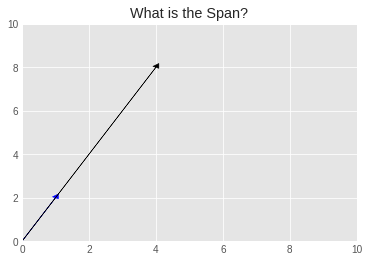

In [215]:
#span
g = [1,2]
#scaled
h = [4,8]

#plot
plt.arrow(0,0, g[0], g[1],head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0,0, h[0], h[1],head_width=.2, head_length=0.2, color ='black')
plt.title("What is the Span?")
plt.xlim(0,10)          
plt.ylim(0,10)
plt.style.use('ggplot')
plt.show()

#the span is linearly dependent and 2 dimensional

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

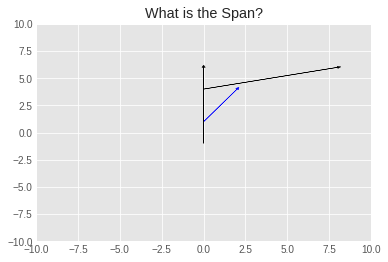

In [218]:
#span
l = [1,2,3]
#scaled
m = [-1,0,7]

n = [4,8,2]

#plot
plt.arrow(0, l[0], l[1],l[2],head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0, m[0], m[1],m[2],head_width=.2, head_length=0.2, color ='black')
plt.arrow(0, n[0], n[1],n[2],head_width=.2, head_length=0.2, color ='black')
plt.title("What is the Span?")
plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.style.use('ggplot')
plt.show()

#the span is linearly independent and three dimensional

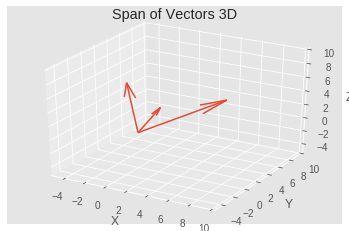

In [239]:
#graphs are not the same
from mpl_toolkits.mplot3d import Axes3D

vectors = np.array([[0,0,0,1, 2, 3],[0,0,0,-1,0, 7],[0,0,0,4,8,2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])
ax.set_zlim([-5, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.style.use('ggplot')
plt.title("Span of Vectors 3D")
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



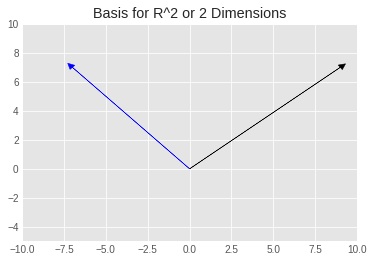

In [250]:
basis_1 = [-7, 5]
basis_2 = [9, 7]
plt.arrow(0,0, basis_1[0], basis_2[1],head_width=.4, head_length=0.4, color ='blue')
plt.arrow(0,0, basis_2[0], basis_2[1],head_width=.4, head_length=0.4, color ='black')
plt.title("Basis for R^2 or 2 Dimensions")
plt.xlim(-10,10)          
plt.ylim(-5,10)
plt.style.use('ggplot')
plt.show()

## 6.2 What does it mean to form a basis?

**Forming a basis means creating a vector space by creating linearly independent vectors, that form a "basis" in multiple dimensions.** 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [260]:
from numpy.linalg import matrix_rank

p = np.matrix('1,2,3;-1,0,7;4,8,2')

#matrix_rank(p)

print('The Rank of the matrix \n', p , ' \n\n is: ', np.linalg.matrix_rank(p),'.')


The Rank of the matrix 
 [[ 1  2  3]
 [-1  0  7]
 [ 4  8  2]]  

 is:  3 .


## 7.2 What does the rank of a matrix tell us?

**The rank of a matrix tells us the maximum number of linearly independent row or column vectors.**

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

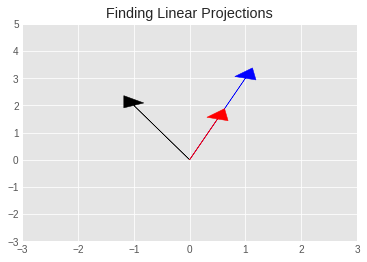

In [292]:
v = np.array([1, 3])
w = np.array([-1, 2])

#L = cv, or c=((w*v)/(v*v)), L = ((w*v)/(v*v))*v
proj_w = ((np.dot(w,v)/(np.dot(v,v))))*v


plt.arrow(0,0, v[0], v[1],head_width=.4, head_length=0.4, color ='blue')
plt.arrow(0,0, w[0], w[1],head_width=.4, head_length=0.4, color ='black')
plt.arrow(0,0, proj_w[0], proj_w[1],head_width=.4, head_length=0.4, color ='red')
plt.title("Finding Linear Projections")
plt.xlim(-3,3)          
plt.ylim(-3,5)
plt.style.use('ggplot')
plt.show()

In [291]:
proj_w = ((np.dot(w,v)/(np.dot(v,v))))*v
proj_w

array([0.5, 1.5])

In [288]:
np.dot(w,v)

5

In [289]:
np.dot(v,v)

10

In [290]:
(5/10)*v

array([0.5, 1.5])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

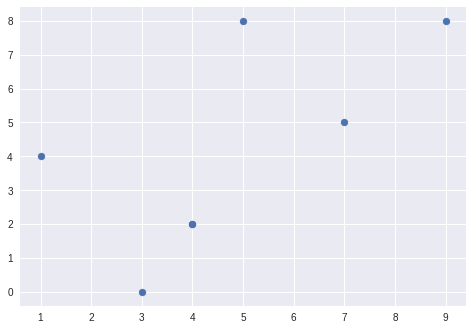

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()